# Notebook 4.1: Ticker-Specific Model Evaluation

## Objective
This notebook evaluates the machine learning model trained specifically for individual stock tickers. It dynamically loads the corresponding model and scaler for the selected ticker to:
1. Make predictions on the stock price (`Adj Close`) based on the processed features.
2. Assess the performance of the model using metrics and visualizations.

## Key Steps
1. **Set Default Ticker**:
   - Define the ticker for evaluation (e.g., XOM).
   - Allows dynamic updates through the Flask web app for other tickers.

2. **Load Data**:
   - Fetch processed stock data specific to the selected ticker from the SQLite database.

3. **Load Model and Scaler**:
   - Load the pre-trained model and scaler files corresponding to the selected ticker.

4. **Evaluate the Model**:
   - Normalize the features using the loaded scaler.
   - Predict stock prices using the selected model.
   - Calculate evaluation metrics such as MAE, MSE, and R-squared.

5. **Visualize Results**:
   - Generate plots to compare actual and predicted prices.
   - Analyze residuals to assess model performance.

## Outputs
- Evaluation metrics for the model's performance.
- Interactive visualizations to understand the model's accuracy and residual behavior.

## Purpose
This notebook is designed to:
- Serve as a standalone evaluation tool for individual stock tickers.
- Provide insights into the performance of the trained model.
- Act as the backend process for the Flask web app by generating ticker-specific results dynamically.


## Import Required Libraries
This section imports the necessary libraries used for:
- Data manipulation and querying (`pandas`, `sqlite3`).
- Machine learning model evaluation (`joblib`, `sklearn.metrics`).
- Visualizations (`matplotlib.pyplot`).


In [1]:
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sqlite3

## Set Default Ticker
Defines the initial ticker symbol for evaluation. By default:
- The ticker is set to **Exxon Mobil (XOM)**.
- This can later be dynamically updated through the Flask app.

Output:
- A message confirming the ticker being evaluated.


In [2]:
# Define the default ticker to evaluate
default_ticker = "XOM"  # Change dynamically via Flask/JS in future
print(f"Evaluating model for Ticker: {default_ticker}")

Evaluating model for Ticker: XOM


In [3]:
# Path to SQLite database
db_path = 'database/stocks_data.db'

# Load processed data for the selected ticker
with sqlite3.connect(db_path) as conn:
    query = f"SELECT * FROM processed_stocks WHERE Ticker = '{default_ticker}'"
    data = pd.read_sql(query, conn)

print(f"Loaded {data.shape[0]} rows for Ticker: {default_ticker}")

Loaded 11791 rows for Ticker: XOM


## Load Data for Selected Ticker
Fetches processed stock data for the selected ticker from the SQLite database:
- **Database Path**: `stocks_data.db`.
- Filters data to only include rows corresponding to the chosen ticker.

Output:
- Total number of rows loaded for the selected ticker.
- Ensures the data being evaluated is specific to the selected company.


In [4]:
# Load the model and scaler for the selected ticker
model_path = f'models/model_{default_ticker}_linear.pkl'
scaler_path = f'models/scaler_{default_ticker}_linear.pkl'

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

print(f"Loaded model and scaler for Ticker: {default_ticker}")

Loaded model and scaler for Ticker: XOM


## Make Predictions and Evaluate the Model
Defines the features and target variable for evaluation:
- **Features**: `['7-day MA', '14-day MA', 'Volatility', 'Lag_1', 'Lag_2']`.
- **Target**: `Adj Close` (Adjusted closing price).

Steps:
1. **Normalize Features**:
   - Ensures the input features are scaled consistently using the pre-trained scaler.
2. **Make Predictions**:
   - Uses the loaded model to predict stock prices (`Adj Close`) based on the features.
3. **Evaluate the Model**:
   - **Mean Absolute Error (MAE)**: Average magnitude of prediction errors.
   - **Mean Squared Error (MSE)**: Average squared prediction errors.
   - **R-squared (R²)**: Proportion of variance explained by the model.

Outputs:
- Key evaluation metrics for assessing model performance.

In [5]:
# Define features and target
features = ['7-day MA', '14-day MA', 'Volatility', 'Lag_1', 'Lag_2']
target = 'Adj Close'

X = data[features]
y = data[target]

# Normalize features
X_scaled = scaler.transform(X)

# Make predictions
y_pred = model.predict(X_scaled)

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.59
Mean Squared Error (MSE): 1.31
R-squared (R²): 1.00


## Actual vs. Predicted Prices
Visualizes the relationship between actual and predicted stock prices:
- **Scatter Plot**: Shows individual data points (actual vs. predicted).
- **Red Dashed Line**: Represents the ideal fit where predictions perfectly match actual values.

Purpose:
- Helps assess how well the model predicts stock prices across the data range.

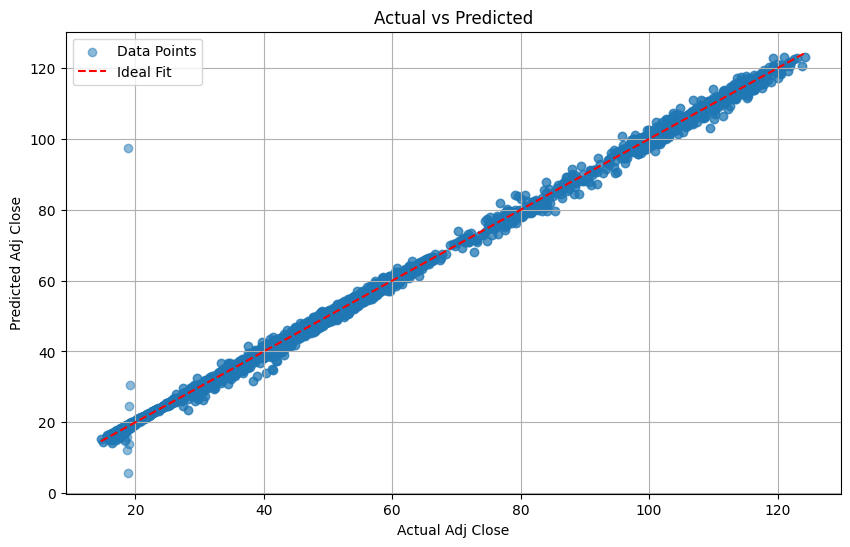

In [6]:
# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, label="Data Points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Adj Close")
plt.ylabel("Predicted Adj Close")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

## Residual Distribution
Visualizes the distribution of residuals (difference between actual and predicted values):
- **Histogram**: Displays the frequency of residual values.
- **Red Dashed Line at Zero**: Indicates perfect predictions.

Purpose:
- Identifies patterns or biases in model errors.
- Helps determine if residuals are normally distributed.


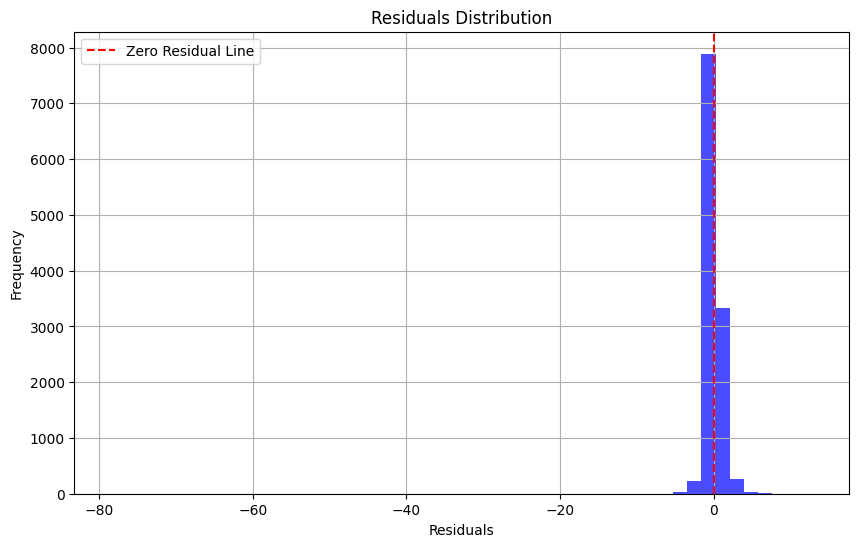

In [7]:
# Histogram of residuals
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

## Residuals vs. Predicted Prices
Scatter plot showing residuals as a function of predicted values:
- **Points**: Represents residuals for each prediction.
- **Red Dashed Line at Zero**: Indicates zero residual error.

Purpose:
- Checks for systematic biases in predictions.
- Ensures residuals are evenly distributed across the prediction range.


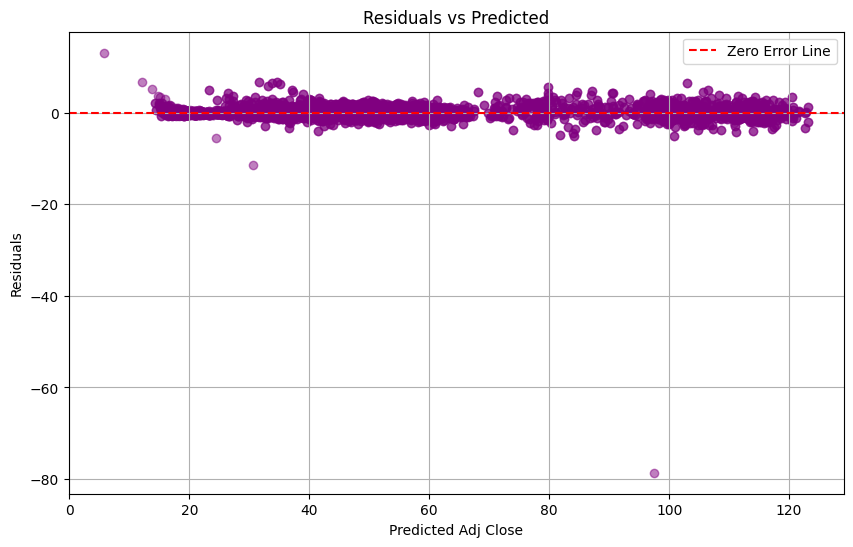

In [8]:
# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Error Line")
plt.xlabel("Predicted Adj Close")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.legend()
plt.grid()
plt.show()